In [ ]:
#Name: Sri Jay Adarsh Gogineni
#ID: 20025484
#HW 02 EDA for Breast cancer Dataset

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
#Load the data into a DataFrame
data = pd.read_csv("breast-cancer-wisconsin.csv")
print(data)

      Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
694   776715   3   1   1   1   3   2   1   1   1      2
695   841769   2   1   1   1   2   1   1   1   1      2
696   888820   5  10  10   3   7   3   8  10   2      4
697   897471   4   8   6   4   3   4  10   6   1      4
698   897471   4   8   8   5   4   5  10   4   1      4

[699 rows x 11 columns]


In [104]:
#Summary of Statistics(min,max,mean)
summary = data.describe()
print(summary)

             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [105]:
#Replace "?" with NaN
data.replace("?", np.nan, inplace=True)

#Identify the missing values
missing_values = data.isna().sum()
print(missing_values)

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [106]:
#Check if F6 are strings
are_strings = data['F6'].apply(lambda x: isinstance(x, str))
print("Are strings:", are_strings.any())

Are strings: True


In [107]:
#Change F6 data to integers
data["F6"] = pd.to_numeric(data["F6"])

In [108]:
#Check if F6 data is now numbers
are_strings = data['F6'].apply(lambda x: isinstance(x, str))
print("Are strings:", are_strings.any())

Are strings: False


In [109]:
#Replace the missing values with the mean of the column
mean_values = data.mean()
data.fillna(mean_values, inplace = True)
missing_values = data.isna().sum()
print(missing_values) #should return 0s because we replaced the missing values with the mean 

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [110]:
#Display frequency table of "Class" vs F6
frequency_table = pd.crosstab(data["Class"], data["F6"])
print(frequency_table)

F6     1.000000   2.000000   3.000000   3.544656   4.000000   5.000000   \
Class                                                                     
2            387         21         14         14          6         10   
4             15          9         14          2         13         20   

F6     6.000000   7.000000   8.000000   9.000000   10.000000  
Class                                                         
2              0          1          2          0          3  
4              4          7         19          9        129  


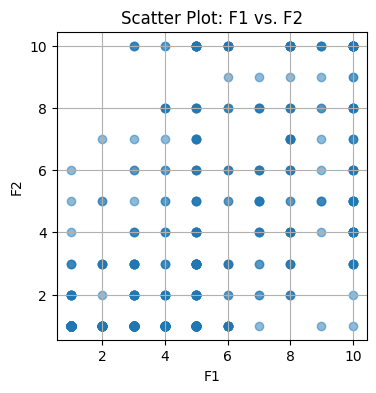

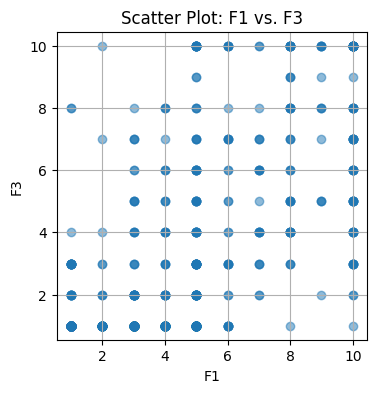

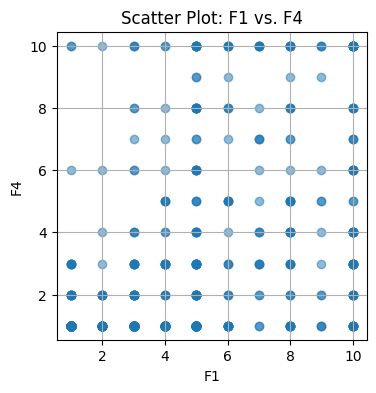

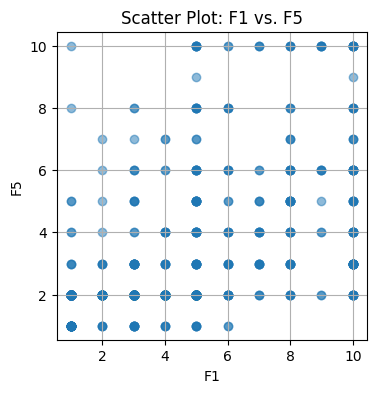

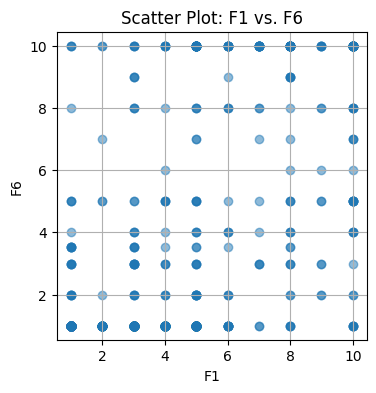

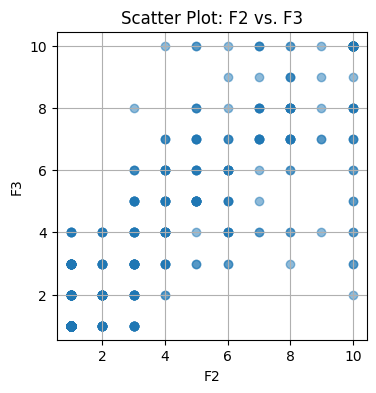

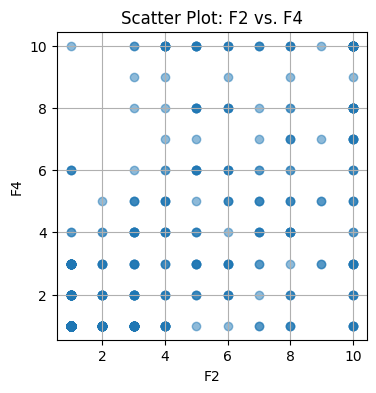

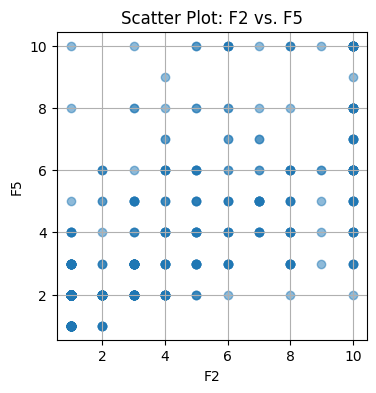

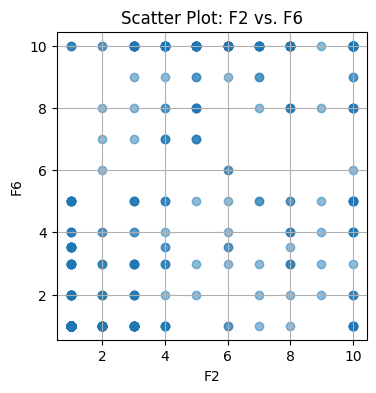

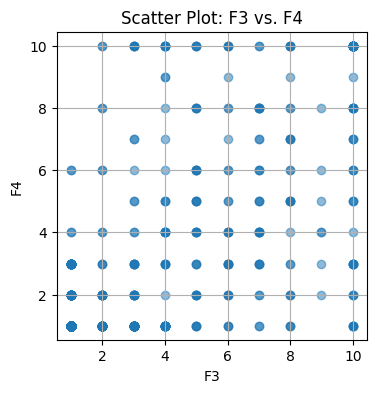

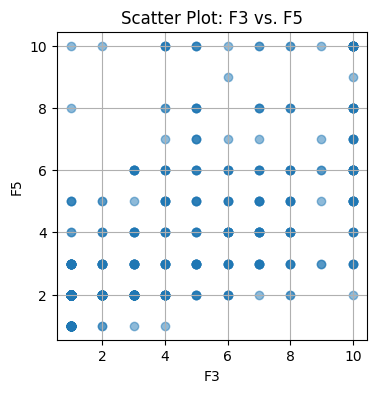

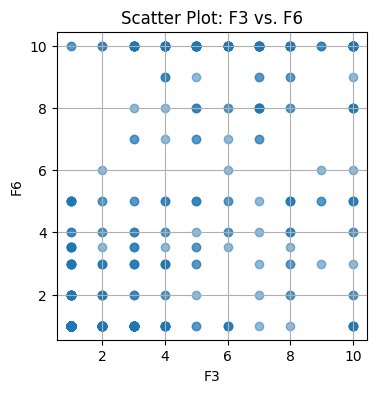

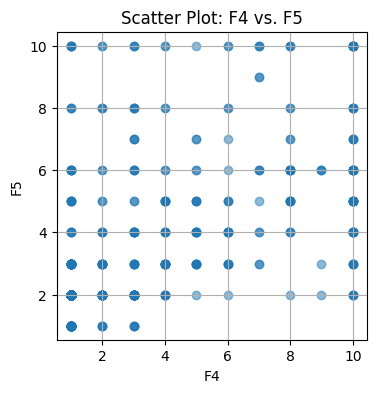

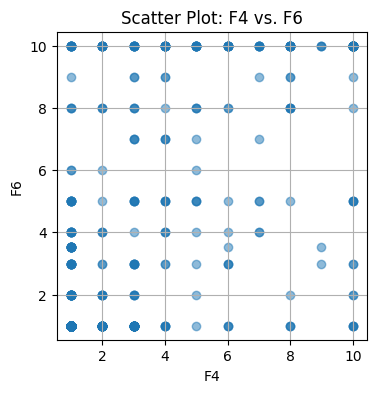

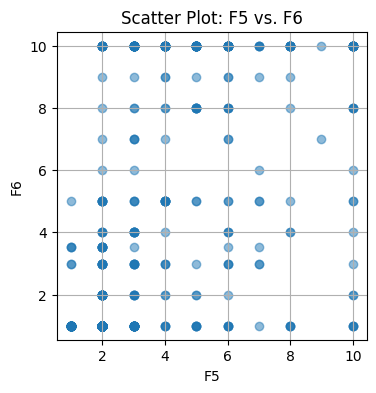

In [111]:
#Display Scatter Plots for Pairs of F1 to F6
cols = ["F1", "F2", "F3", "F4", "F5", "F6"]
#Iterate through to get all possible pairs of columns
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)):
        plt.figure(figsize=(4, 4))
        plt.scatter(data[cols[i]], data[cols[j]], alpha=0.5)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(f"Scatter Plot: {cols[i]} vs. {cols[j]}")
        plt.grid(True)
        plt.show()

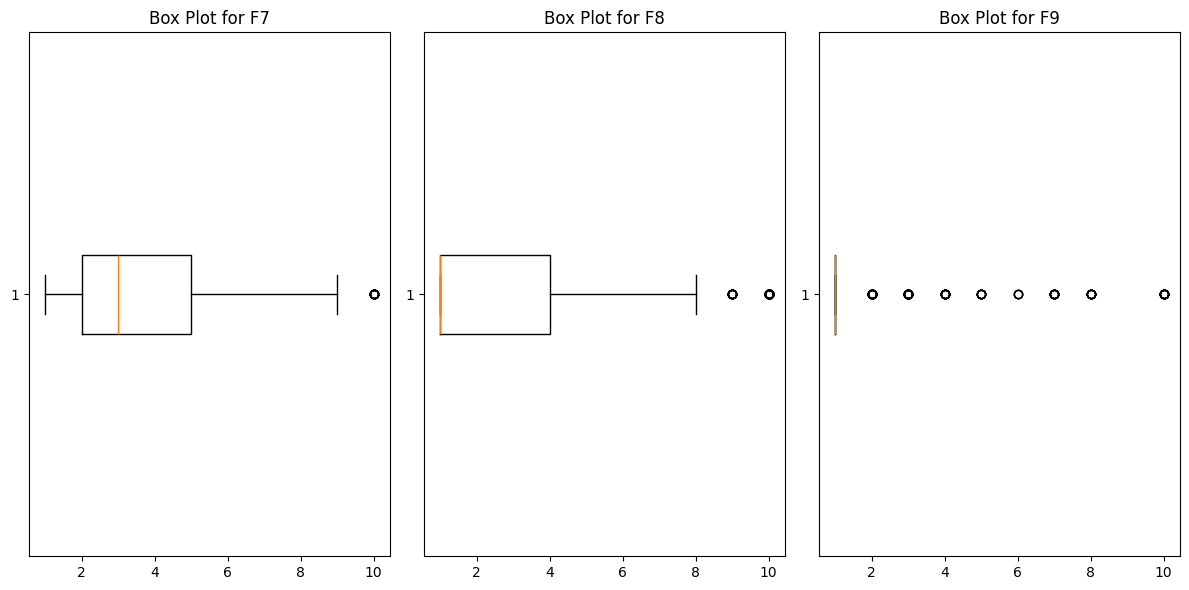

In [112]:
#Show histogram box plot for columns F7 to F9
# Create a subplot with three histogram box plots for columns F7 to F9
plt.figure(figsize=(12, 6))

# Histogram box plot for F7
plt.subplot(1, 3, 1)
plt.boxplot(data["F7"], vert=False)
plt.title("Box Plot for F7")

# Histogram box plot for F8
plt.subplot(1, 3, 2)
plt.boxplot(data["F8"], vert=False)
plt.title("Box Plot for F8")

# Histogram box plot for F9
plt.subplot(1, 3, 3)
plt.boxplot(data["F9"], vert=False)
plt.title("Box Plot for F9")

plt.tight_layout()
plt.show()

In [113]:
#Delete all objects
del data,summary,missing_values,frequency_table

In [114]:
#Reload the data
data = pd.read_csv("breast-cancer-wisconsin.csv")

In [115]:
#Replace "?" with NaN
data.replace("?", np.nan, inplace=True)

In [116]:
#Drop any row with a missing value in any columns
data.dropna(inplace=True)

In [117]:
print(data)

      Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
694   776715   3   1   1   1   3   2   1   1   1      2
695   841769   2   1   1   1   2   1   1   1   1      2
696   888820   5  10  10   3   7   3   8  10   2      4
697   897471   4   8   6   4   3   4  10   6   1      4
698   897471   4   8   8   5   4   5  10   4   1      4

[683 rows x 11 columns]
